# Programming Homework #1

학번 : 2017111299

이름 : 이혜원

---

csv 파일을 통해 50명의 키와 몸무게가 들어있는 파일을 준비하여 pandas를 사용해 해당 파일을 읽고 다음을 수행하세요.

In [1]:
import pandas as pd

data = pd.read_csv("datasets/data.csv") #데이터 불러오기
data = data.iloc[:50]          #50개의 데이터만 사용

In [2]:
data.info()                    #데이터에 대한 간략한 정보 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      50 non-null     int64  
 1   측정 일자      50 non-null     int64  
 2   가슴 둘레(cm)  50 non-null     float64
 3   소매길이(cm)   50 non-null     float64
 4   신장(cm)     50 non-null     float64
 5   허리 둘레(cm)  50 non-null     float64
 6   샅높이(cm)    50 non-null     float64
 7   머리 둘레(cm)  50 non-null     float64
 8   발 길이(cm)   50 non-null     float64
 9   몸무게(kg)    50 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 4.0 KB


### 1. head()메소드를 사용하여 5명까지의 키와 몸무게를 출력하세요.

In [3]:
data[['신장(cm)','몸무게(kg)']].head() #5명의 데이터 출력

,신장(cm),몸무게(kg)
0,185.5,73.2
1,167.2,65.1
2,179.9,93.2
3,171.4,71.6
4,176.9,67.1


### 2. matplotlib를 사용하여 데이터를 시각화해보세요

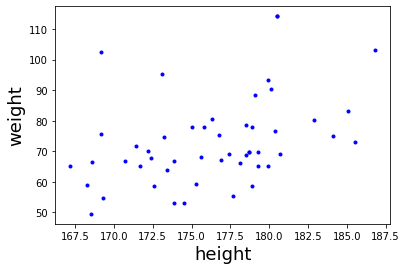

In [4]:
import matplotlib.pyplot as plt

X = data['신장(cm)']
y = data['몸무게(kg)']

plt.plot(X, y, "b.")
plt.xlabel("height", fontsize=18)
plt.ylabel("weight", fontsize=18)
plt.show()

### 3. 사이킷런을 사용해 선형회귀를 실행하여 키가 160cm인 사람의 몸무게를 예측하여 출력하고 절편과 기울기를 각각 출력하세요.

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()          # LinearRegression() 클래스 호출
X_reshape = X.values.reshape(-1,1)    # X를 2차원 Array형태로 변환
lin_reg.fit(X_reshape, y)             # .fit(x, y) : 데이터 이용해 모델 생성

X_new = 160                              # 조건
y_predict = lin_reg.predict([[X_new]])   # 예측 결과

In [6]:
text = '키가 {x}cm인 사람의 예측 몸무게 : {y}kg'
print(text.format(x=X_new, y=y_predict))

키가 160cm인 사람의 예측 몸무게 : [53.29442649]kg


In [7]:
text = '절편 : {a}, 기울기 : {b}'
print(text.format(a=lin_reg.intercept_, b=lin_reg.coef_))

절편 : -142.35515982007138, 기울기 : [1.22280991]


### 4. matplotlib를 사용하여 예측 결과를 시각화해보세요.

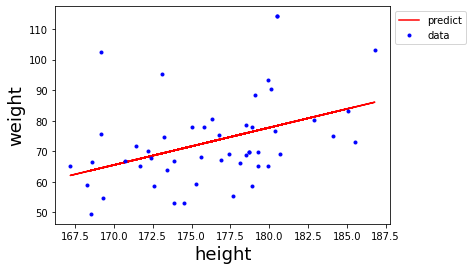

In [8]:
Y = lin_reg.predict(X_reshape)
plt.plot(X, Y, "r-", label='predict')   # 예측 결과
plt.plot(X, y, "b.", label='data')      # 기존 데이터

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0)) #범례를 그래프 밖에 배치
plt.xlabel("height", fontsize=18)
plt.ylabel("weight", fontsize=18)
plt.show()


---


# Version

In [9]:
import sys
import matplotlib
import sklearn

print("Python : ", sys.version)
print("pandas : ", pd.__version__)
print("matplotlib : ", matplotlib.__version__)
print("sklearn : ", sklearn.__version__)

Python :  3.7.9 (tags/v3.7.9:13c94747c7, Aug 17 2020, 18:58:18) [MSC v.1900 64 bit (AMD64)]
pandas :  1.1.4
matplotlib :  3.3.2
sklearn :  0.23.2
